# Uber Data Anlysis
#### Version 0.1

Analysis of a user's Uber Trips

TBD

In [1]:
# General syntax to import specific functions in a library: 
##from (library) import (specific library function)
from pandas import DataFrame, read_csv

import numpy as np
import pandas as pd
import matplotlib as plt
import sys
import datetime as dt

# Enable inline plotting
%matplotlib inline

# Style the plots
plt.style.use('ggplot')

In [2]:
print('Python version ' + sys.version)
print('Pandas version ' + pd.__version__)
print('Matplotlib version ' + plt.__version__)

Python version 3.5.1 (default, Apr 18 2016, 11:46:32) 
[GCC 4.2.1 Compatible Apple LLVM 7.3.0 (clang-703.0.29)]
Pandas version 0.18.1
Matplotlib version 1.5.1


In [3]:
file_location = r'~/Projects/uber_receipts/_data/1465662001.csv'
# Read the CSV file and add custom header names
raw_data = pd.read_csv(file_location, header=None, names=['date', 'driver', 'fare', 'car_type', 'city', 'map'])

In [4]:
#
# DATA CLEANUP
# 
# Convert the date column to a datetime object
raw_data['date'] = pd.to_datetime(raw_data['date'], format='%Y-%m-%d')
# Set the date as the index of the DataFrame
raw_data.set_index('date', inplace=True)

In [5]:
# Remove the currency sign from the beginning of the Fare
# 
# Major assumption here is that the currency
# is un USD -- Change the value of
# currency_sign depending on the currency of your
# account
currency_sign = '$'
raw_data['fare'] = raw_data.fare.str.replace(currency_sign, '')

In [6]:
# Split the Paid rides / Canceled rides and Free rides
# into 3 separate data frames
paid_rides = raw_data.copy(deep=True)
paid_rides['fare'] = pd.to_numeric(paid_rides['fare'], errors='coerce').fillna(0)

In [7]:
# Canceled Rides
canceled_rides = raw_data[raw_data['fare'] == "Canceled"]

In [8]:
# Free Rides
free_rides = raw_data[raw_data['fare'] == "Free"]

### #1) What is the total number of rides per month?

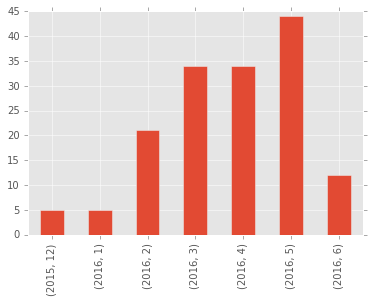

In [9]:
p = paid_rides['fare'].groupby([paid_rides.index.year, paid_rides.index.month]).count()
p.plot(kind='bar')

### #2) Top 10 rides completed with the same driver?

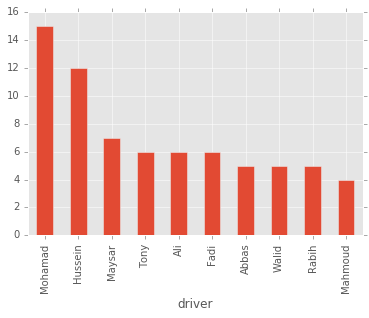

In [10]:
p = paid_rides['driver'].groupby(paid_rides.driver).count().sort_values(ascending=False)[:10]
p.plot(kind='bar')

### #3) Total cost of rides per month?

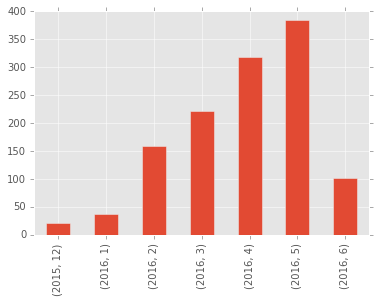

In [11]:
p = paid_rides['fare'].groupby([paid_rides.index.year, paid_rides.index.month]).sum()
p.plot(kind='bar')

### #4) Total cost of rides per week?

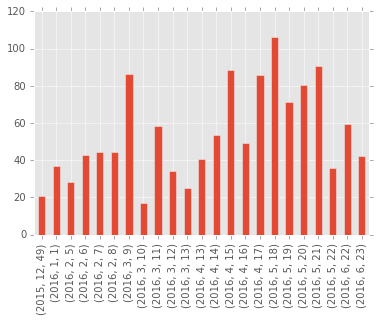

In [12]:
p = paid_rides['fare'].groupby([paid_rides.index.year, paid_rides.index.month, paid_rides.index.week]).sum()
p.plot(kind='bar')

### #5) Average ride cost per year?

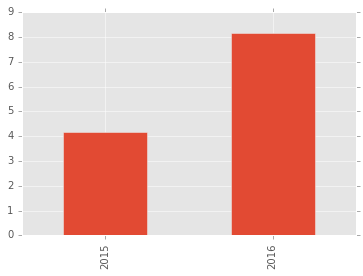

In [13]:
p = paid_rides['fare'].groupby(paid_rides.index.year).mean()
p.plot(kind='bar')

### #6) Average single ride cost per week?

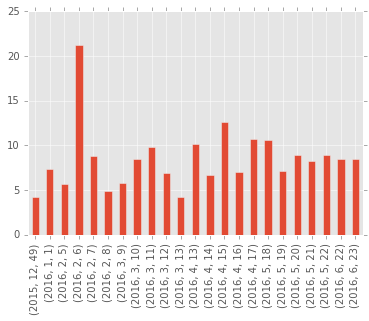

In [14]:
p = paid_rides['fare'].groupby([paid_rides.index.year, paid_rides.index.month, paid_rides.index.week]).mean()
p.plot(kind='bar')

### #7) Most expensive ride per year?

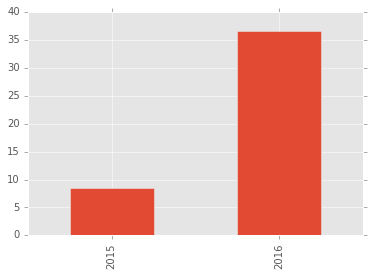

In [15]:
p = paid_rides['fare'].groupby([paid_rides.index.year]).max()
p.plot(kind='bar')

### #8) Top 15 max number of rides per day per year?

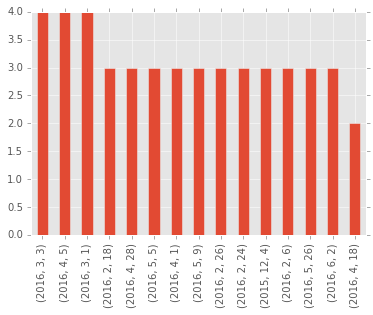

In [16]:
p = paid_rides['fare'].groupby([paid_rides.index.year, paid_rides.index.month, paid_rides.index.day]).count()
p = p.sort_values(ascending=False)[:15]
p.plot(kind='bar')

### #9) Average number of rides per week per month?

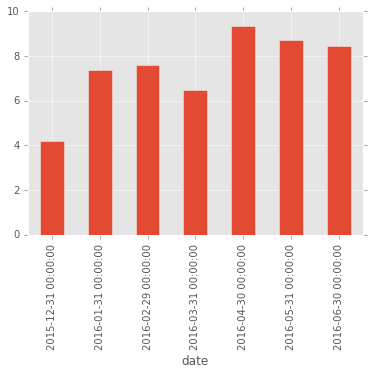

In [17]:
p = paid_rides['fare'].groupby(pd.TimeGrouper(freq='M')).mean()
p.plot(kind='bar')